# Metody klasyfikacji i redukcji wymiaru

## Zastosowanie algorytmu EM do uproszczonej wersji znajdowania motywów w ciągach DNA

Błażej Wiórek, Zofia Dziedzic

### Opis problemu

Obserwujemy wektor losowy $\mathbf{X} = (X_1, X_2, \ldots, X_w)$, taki że $X_1, X_2, \ldots, X_w$ są niezależne o rozkładzie

$$
    p(x_i; \mathbf{\theta_i}) = \theta_{1i}\mathbb{1}_{\{1\}}(x_i) + \theta_{2i}\mathbb{1}_{\{2\}}(x_i) + \theta_{3i}\mathbb{1}_{\{3\}}(x_i) + \theta_{4i}\mathbb{1}_{\{4\}}(x_i),
$$

gdzie $\mathbf{\theta_i} = (\theta_{1i}, \theta_{2i}, \theta_{3i}, \theta_{4i})^T$. Oznacza to, że zmienne $X_i$, $i \in \{1,2,\ldots,w\}$ przyjmują wartości ze zbioru $\{1,2,3,4\}$ odpowiednio z prawdopodobieństwami $\theta_{1i}, \theta_{2i}, \theta_{3i}, \theta_{4i}$. Wobec tego

$$
    p(\mathbf{x}; \mathbf{\theta}) = \prod_{i=1}^{w} p(x_i; \mathbf{\theta_i}).
$$

Naszym zadaniem będzie modelowanie tego wektora w sytuacji, gdy $\mathbf{\theta_i}, i = 1, 2, \ldots, w$ może przyjmować jedną z dwóch postaci

$$
    \boldsymbol{\theta^{(0)}_i} = (\theta^{(0)}_{1i}, \theta^{(0)}_{2i}, \theta^{(0)}_{3i}, \theta^{(0)}_{4i})^T,
$$

$$
    \boldsymbol{\theta^{(1)}_i} = (\theta^{(1)}_{1i}, \theta^{(1)}_{2i}, \theta^{(1)}_{3i}, \theta^{(1)}_{4i})^T.
$$

Oznaczmy przez $\mathbf\Theta^{(0)}$ macierz, której elementami są $\theta^{(0)}_{ki}$, $k = 1,2,3,4$ i, analogicznie, $\mathbf\Theta^{(1)} = (\mathbf\theta^{(1)}_1, \theta^{(1)}_2, \ldots, \theta^{(1)}_w)$.
O tym, z którego z rozkładów - $p(\mathbf{x}; \mathbf\theta^{(0)})$ czy $p(\mathbf{x}; \mathbf\theta^{(1)})$ - pochodzi $X$, decyduje inna zmienna losowa, $Z$, która z p-stwem $\alpha_0$ jest równa $0$ i z p-stwem $\alpha_1 = 1 - \alpha_0$ jest równa $1$.
Niech

$$
\mathbf{x}_1 = x_{11}, x_{12}, \ldots, x_{1i}, \ldots, x_{1w} \\
\mathbf{x}_2 = x_{21}, x_{22}, \ldots, x_{2i}, \ldots, x_{2w} \\
\ldots \\
\mathbf{x}_j = x_{j1}, x_{j2}, \ldots, x_{ji}, \ldots, x_{jw} \\
\ldots \\
\mathbf{x}_k = x_{k1}, x_{k2}, \ldots, x_{ki}, \ldots, x_{kw}
$$

będą zaobserwowanymi niezależnymi realizacjami wektora losowego $\mathbf{X}$. Każdej z nich odpowiada $z_j$, $j = 1, \ldots, k$, które decyduje o rozkładzie $X_j$.

W oparciu o daną próbę, ale nie znając wartości $z_1, \ldots, z_k$, chcemy wyestymować parametry $\mathbf{\Theta} = (\mathbf\Theta^{(0)}, \mathbf\Theta^{(1)})$ i $\alpha = (\alpha_0, \alpha_1)$.

### Funkcja wiarogodności

Parametrów $\hat{\mathbf{\Theta}}$ i $\hat\alpha$ będziemy szukać, maksymalizując logarytm funkcji wiarogodności
$$
l(\mathbf{\Theta},\alpha) = \log L(\mathbf{\Theta}, \alpha) = \sum_{j=1}^k \log p(\mathbf{x_j}, z_j; \mathbf{\Theta}, \alpha) = 
 \sum_{j=1}^k \log (p(\mathbf{x_j}, \mathbf\Theta^{(0)})\alpha_0 + p(\mathbf{x_j}, \mathbf\Theta^{(1)})\alpha_1).
$$

Ponieważ nie jesteśmy w stanie znaleźć estymatorów największej wiarogodności analitycznie, użyjemy w tym celu algorytmu EM, który opisujemy krótko poniżej.

### Algorytm EM

Idea tej procedury opiera się na fakcie, że dla znanego $\mathbf{z} = (z_1, z_2, \ldots, z_k)^T$ łatwo znaleźć $\hat{\mathbf{\Theta}}$ i $\hat \alpha$. Algorytm składa się więc z następujących dwóch kroków, które po odpowiedniej liczbie iteracji pozwalają skutecznie wyestymować szukane parametry:

   1. **Expectation**
    
   "Zgadnięcie" $\mathbf{z}$, które w praktyce polega na obliczeniu "wag" $\mathbf{w^0} = (w_0^{(1)},\ldots,w_0^{(k)})$, 
   $\mathbf{w^1} = (w^1_{(1)},\ldots,w^1_{(k)})$, takich że
   
   $$
   w^0_{(j)} = \mathbb{P}(z_j = 0|\mathbf{X_j} = \mathbf{x_j}; \mathbf{\Theta}) = 
   \frac{\mathbb{P}(\mathbf{X_j} = \mathbf{x_j}|z_j = 0; \mathbf{\Theta^{(0)})}\alpha_0}{\mathbb{P}(\mathbf{X_j} = \mathbf{x_j}|z_j = 0; \mathbf{\Theta^{(0)})}\alpha_0 + \mathbb{P}(\mathbf{X_j} = 
   \mathbf{x_j}|z_j = 1; \mathbf{\Theta^{(1)})}\alpha_1} =
   \frac{\prod_{i=1}^{w}\theta^{(0)}_{x_{ji}}\alpha_0}{\prod_{i=1}^{w}\theta^{(0)}_{x_{ji}}\alpha_0 + \prod_{i=1}^{w}\theta^{(1)}_{x_{ji}}\alpha_1}
   $$
   i
    $$
   w^1_{(j)} = \mathbb{P}(z_j = 1|\mathbf{X_j} = \mathbf{x_j}; \mathbf{\Theta}) = 
   \frac{\mathbb{P}(\mathbf{X_j} = \mathbf{x_j}|z_j = 1; \mathbf{\Theta^{(1)})}\alpha_1}
   {\mathbb{P}(\mathbf{X_j} = \mathbf{x_j}|z_j = 0; \mathbf{\Theta^{(0)}})\alpha_0 
   + \mathbb{P}(\mathbf{X_j} = \mathbf{x_j}|z_j = 1; \mathbf{\Theta^{(1)}})\alpha_1} = 
   \frac{\prod_{i=1}^{w}\theta^{(1)}_{x_{ji}}\alpha_1}{\prod_{i=1}^{w}\theta^{(0)}_{x_{ji}}\alpha_0 +
   \prod_{i=1}^{w}\theta^{(1)}_{x_{ji}}\alpha_1}.
   $$
   
   2. **Maximization**
   
   Wyliczenie, dla danych $\mathbf{w^0}$ i $\mathbf{w^1}$,
   
   $$ 
   \hat{\theta}^{(0)}_{1i} = \frac{\sum_{j=1}^k w^0_{(j)}\mathbb{1}_{\{1\}}(x_{ji})}{\sum_{j=1}^k w^0_{(j)}},
   $$
   
   $$
   \vdots \\
   \hat{\theta}^{(0)}_{4i} = \frac{\sum_{j=1}^k w^0_{(j)}\mathbb{1}_{\{4\}}(x_{ji})}{\sum_{j=1}^k w^0_{(j)}},
   $$
   
   $$ 
   \hat{\theta}^{(1)}_{1i} = \frac{\sum_{j=1}^k w^1_{(j)}\mathbb{1}_{\{1\}}(x_{ji})}{\sum_{j=1}^k w^1_{(j)}},
   $$
   
   $$
   \vdots \\
   \hat{\theta}^{(1)}_{4i} = \frac{\sum_{j=1}^k w^1_{(j)}\mathbb{1}_{\{4\}}(x_{ji})}{\sum_{j=1}^k w^1_{(j)}},
   $$
   
   $$
   \hat{\alpha}_0 = \frac{1}{k}\sum_{j=1}^k w^0_j,
   $$
   
   $$
   \hat{\alpha}_1 = 1 - \hat{\alpha}_0.
   $$

### Generowanie danych i implementacja algorytmu

Program, który stworzyliśmy, dla zadanych parametrów $w, k, \alpha \; (=\alpha_0), \mathbf\Theta^{(0)}, \mathbf\Theta^{(1)}$ i wygenerowanego na ich podstawie $\mathbf{X} \in \{1,2,3,4\}^{w\times k}$, oblicza za pomocą EM $\hat{\mathbf{\Theta}}$. W drugiej wersji, gdy parametr `--estimate_alpha` jest równy `yes`, estymujemy także parametr $\alpha$.

### Wizualizacja jakości estymacji

Poniższe wykresy przedstawiają porównanie wyestymowanych parametrów rozkładku jako uśrednienie z trzech prób powtórzenia eksperymentu z wartościami teoretycznymi.

In [1]:
from controller import repeat_experiment, read_results, single_run
from generate_data import get_data, get_thetas
from visualisations import show_distributions, plot_convergence

import numpy as np
import os

In [2]:
params_file_path = os.path.join(os.getcwd(), 'input_data', 'params.json')
dest_file = os.path.join(os.getcwd(), 'saved_simulations', 'test.json')

In [3]:
repeat_experiment(params_file_path, dest_file, est_alpha="yes")

Source: /home/wiorek/PycharmProjects/EM_Algorithm/input_data/params.json
Destination: /home/wiorek/PycharmProjects/EM_Algorithm/saved_simulations/test.json


#### w=3, k=10000, estimate_alpha='yes', alpha=0.5 

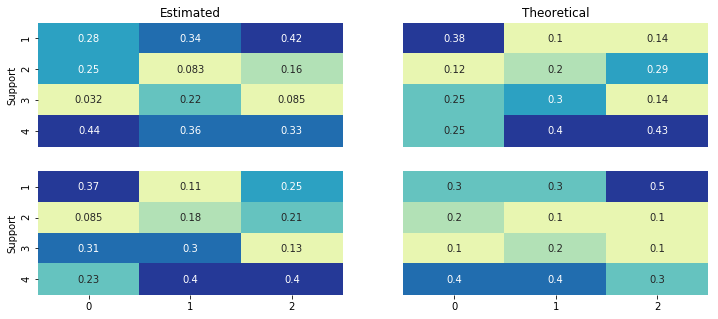

In [4]:
simulation_keys = ['theta_a_est', 'theta_b_est', 'theta_a', 'theta_b']
simulation_res = read_results(dest_file)
show_distributions(*(simulation_res[k] for k in simulation_keys))

In [5]:
"Estimated alpha {}".format(round(simulation_res['alpha'], 3))

'Estimated alpha 0.44'

#### w=3, k=10000, estimate_alpha='no', alpha=0.5

In [6]:
repeat_experiment(params_file_path, dest_file)

Source: /home/wiorek/PycharmProjects/EM_Algorithm/input_data/params.json
Destination: /home/wiorek/PycharmProjects/EM_Algorithm/saved_simulations/test.json


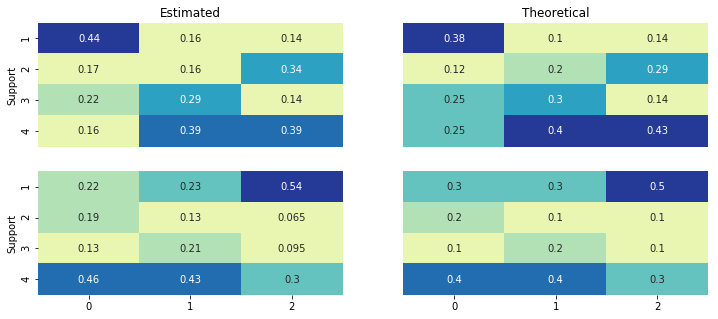

In [7]:
simulation_keys = ['theta_a_est', 'theta_b_est', 'theta_a', 'theta_b']
simulation_res = read_results(dest_file)
show_distributions(*(simulation_res[k] for k in simulation_keys))

In [8]:
"Estimated alpha {}".format(round(simulation_res['alpha'], 3))

'Estimated alpha 0.5'

#### w=10, k=10000, estimate_alpha='yes', alpha=0.3

In [9]:
params_file_path = os.path.join(os.getcwd(), 'input_data', 'params_set_alpha3.json')
dest_file = os.path.join(os.getcwd(), 'saved_simulations', 'test_w10.json')

In [10]:
repeat_experiment(params_file_path, dest_file, est_alpha="yes")

Source: /home/wiorek/PycharmProjects/EM_Algorithm/input_data/params_set_alpha3.json
Destination: /home/wiorek/PycharmProjects/EM_Algorithm/saved_simulations/test_w10.json


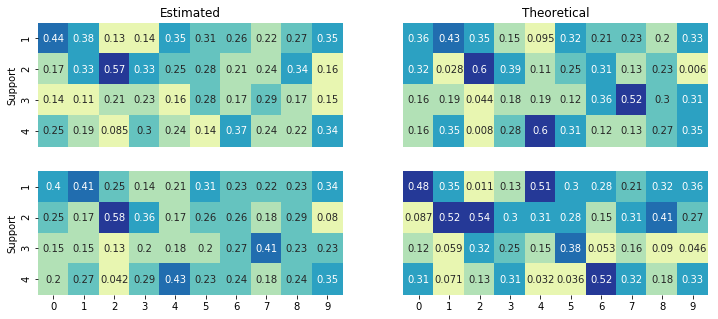

In [11]:
simulation_keys = ['theta_a_est', 'theta_b_est', 'theta_a', 'theta_b']
simulation_res = read_results(dest_file)
show_distributions(*(simulation_res[k] for k in simulation_keys))

In [12]:
"Estimated alpha {}".format(round(simulation_res['alpha'], 3))

'Estimated alpha 0.433'

#### w=10, k=10000, estimate_alpha='no', alpha=0.3

In [13]:
repeat_experiment(params_file_path, dest_file, est_alpha="no", alpha=0.3)

Source: /home/wiorek/PycharmProjects/EM_Algorithm/input_data/params_set_alpha3.json
Destination: /home/wiorek/PycharmProjects/EM_Algorithm/saved_simulations/test_w10.json


In [14]:
repeat_experiment(params_file_path, dest_file)

Source: /home/wiorek/PycharmProjects/EM_Algorithm/input_data/params_set_alpha3.json
Destination: /home/wiorek/PycharmProjects/EM_Algorithm/saved_simulations/test_w10.json


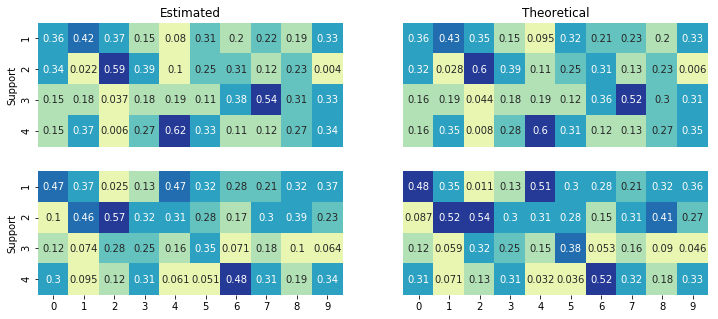

In [15]:
simulation_keys = ['theta_a_est', 'theta_b_est', 'theta_a', 'theta_b']
simulation_res = read_results(dest_file)
show_distributions(*(simulation_res[k] for k in simulation_keys))

Na koniec prezentujemy, jak w zależności od liczby iteracji zmieniały się: $\Vert\hat{\mathbf{\Theta}}^0 - {\mathbf{\Theta}}^0\Vert_2$, $\Vert\hat{\mathbf{\Theta}}^1 - {\mathbf{\Theta}}^1\Vert_2$ i $\hat \alpha$.

#### w=10, k=10000, estimate_alpha='yes', alpha=0.3

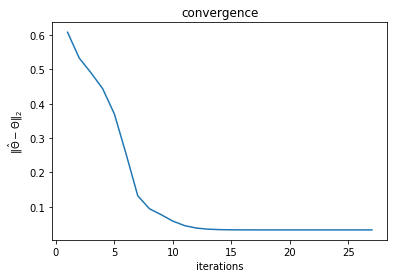

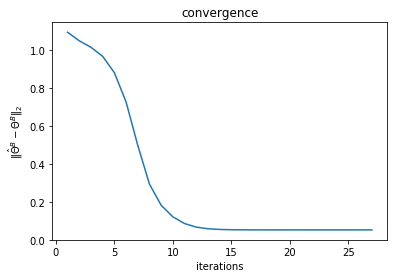

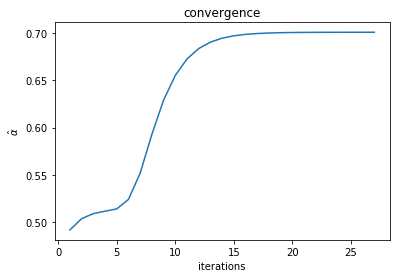

In [16]:
params_file_path = os.path.join(os.getcwd(), 'input_data', 'params_set_alpha3.json')

X = get_data(params_file_path)["X"].astype(int)
alpha = get_data(params_file_path)["alpha"]
theta_a, theta_b = get_thetas(params_file_path)

plot_convergence(X, theta_a_org = theta_a, theta_b_org = theta_b, max_rep=1000, est_alpha="yes", alpha=alpha)